In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load KC2 dataset
kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/kc2.csv")

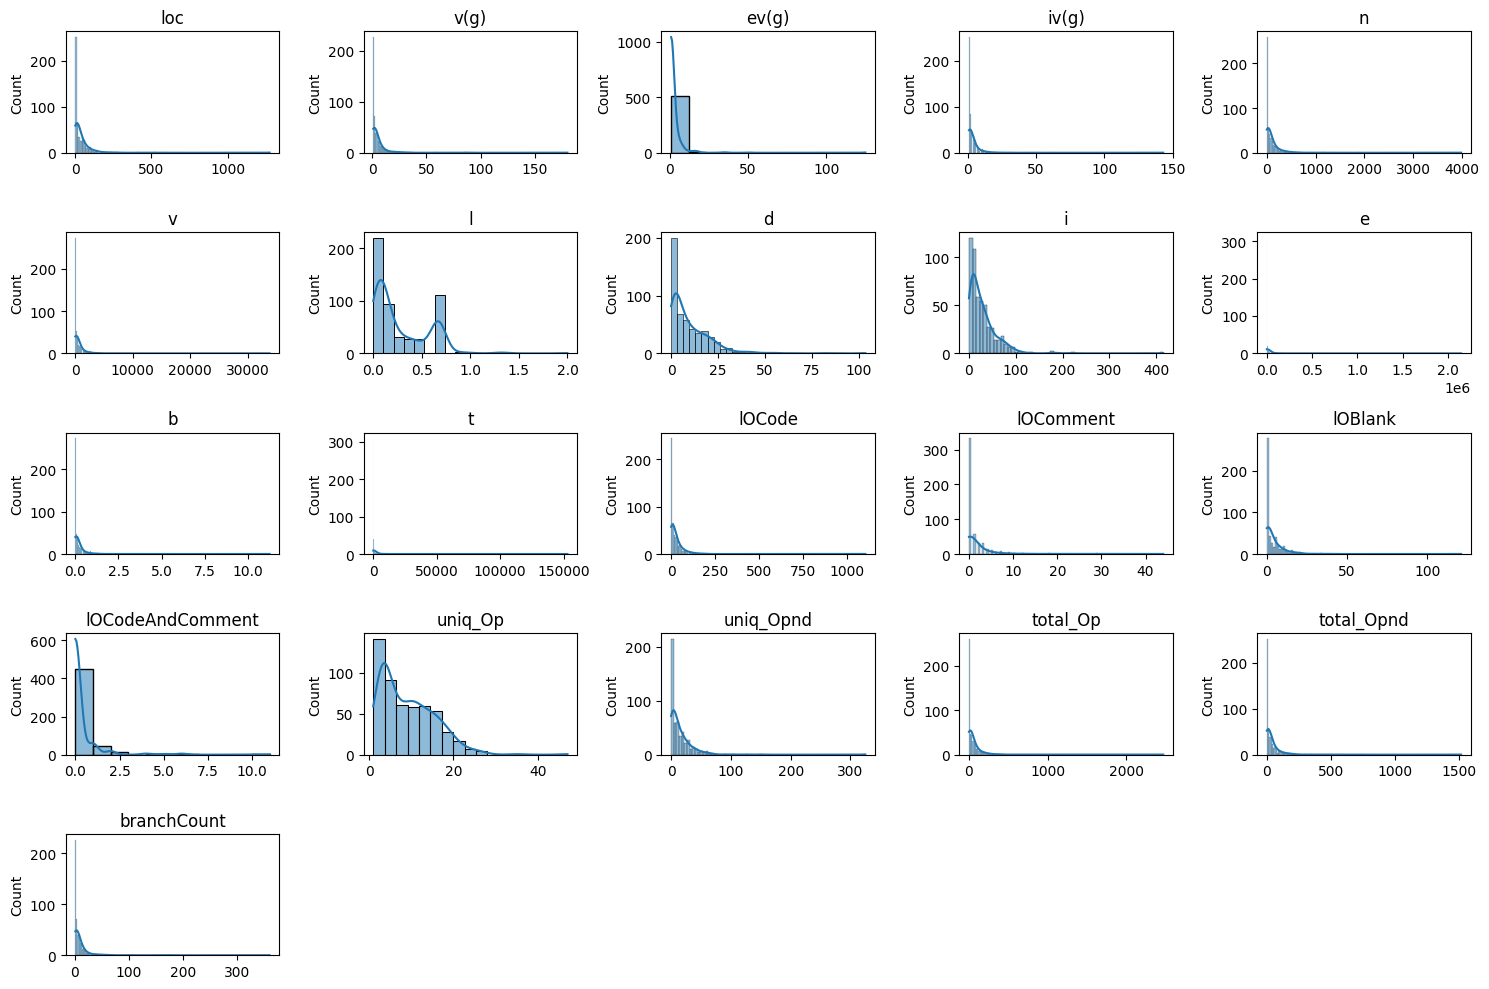

In [5]:
# Visualize histograms for all attributes
plt.figure(figsize=(15, 10))
for i, column in enumerate(kc2_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.histplot(kc2_data[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

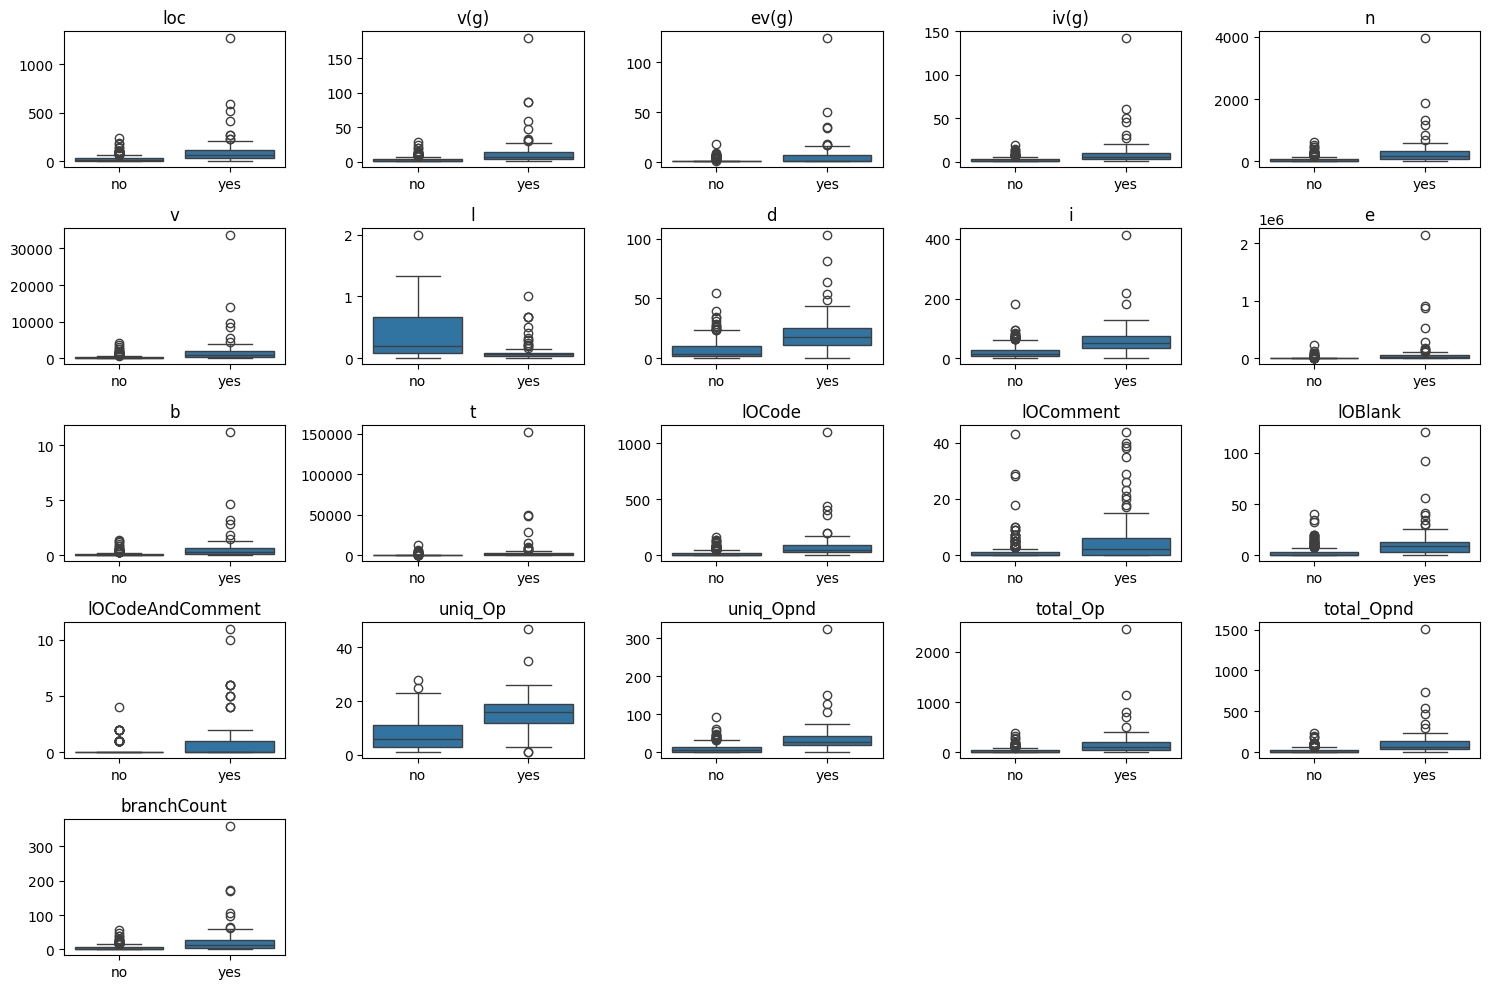

In [6]:
# Visualize box plots for all attributes
plt.figure(figsize=(15, 10))
for i, column in enumerate(kc2_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='problems', y=column, data=kc2_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [7]:
# # Visualize pair plot for all attributes
# sns.pairplot(kc2_data, hue='problems')
# plt.show()

Data Normalization using min max scaler

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/kc2.csv")

# Separate features and target variable
X = kc2_data.drop(columns=["problems"])
y = kc2_data["problems"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Concatenate the normalized features with the target variable
normalized_kc2_data = pd.concat([X_normalized_df, y], axis=1)

# Save the normalized dataset
normalized_kc2_data.to_csv("/content/drive/MyDrive/CAPSTONE/normalized_kc2.csv", index=False)

Data loading and splitting

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report

#Loading the datset

kc2_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/normalized_kc2.csv")

# Preprocess data
X = kc2_data.drop(columns=["problems"])
y = kc2_data["problems"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ML model training on original KC2 Dataset

Random forest classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print("Classification Report:")
print(classification_report_rf)

Metrics for Random Forest Classifier:
Accuracy: 0.780952380952381
Precision: 0.7556253270538984
Classification Report:
              precision    recall  f1-score   support

          no       0.81      0.93      0.87        80
         yes       0.57      0.32      0.41        25

    accuracy                           0.78       105
   macro avg       0.69      0.62      0.64       105
weighted avg       0.76      0.78      0.76       105



Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC

# Train SVM Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
classification_report_svm = classification_report(y_test, y_pred_svm)

print("Metrics for Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print("Classification Report:")
print(classification_report_svm)

Metrics for Support Vector Machine (SVM) Classifier:
Accuracy: 0.8476190476190476
Precision: 0.847427934384456
Classification Report:
              precision    recall  f1-score   support

          no       0.85      0.97      0.91        80
         yes       0.85      0.44      0.58        25

    accuracy                           0.85       105
   macro avg       0.85      0.71      0.74       105
weighted avg       0.85      0.85      0.83       105



Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print("Metrics for Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print("Classification Report:")
print(classification_report_logreg)

Metrics for Logistic Regression Classifier:
Accuracy: 0.8095238095238095
Precision: 0.8476190476190476
Classification Report:
              precision    recall  f1-score   support

          no       0.80      1.00      0.89        80
         yes       1.00      0.20      0.33        25

    accuracy                           0.81       105
   macro avg       0.90      0.60      0.61       105
weighted avg       0.85      0.81      0.76       105



K-Nearest Neighbors (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)

print("Metrics for K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print("Classification Report:")
print(classification_report_knn)

Metrics for K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.780952380952381
Precision: 0.7628170041963146
Classification Report:
              precision    recall  f1-score   support

          no       0.83      0.90      0.86        80
         yes       0.56      0.40      0.47        25

    accuracy                           0.78       105
   macro avg       0.69      0.65      0.66       105
weighted avg       0.76      0.78      0.77       105



Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
classification_report_gb = classification_report(y_test, y_pred_gb)

print("Metrics for Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print("Classification Report:")
print(classification_report_gb)

Metrics for Gradient Boosting Classifier:
Accuracy: 0.780952380952381
Precision: 0.7588616907437131
Classification Report:
              precision    recall  f1-score   support

          no       0.82      0.91      0.86        80
         yes       0.56      0.36      0.44        25

    accuracy                           0.78       105
   macro avg       0.69      0.64      0.65       105
weighted avg       0.76      0.78      0.76       105



Comparison Between models

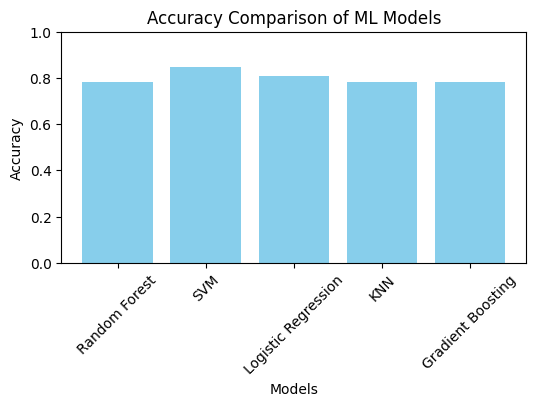

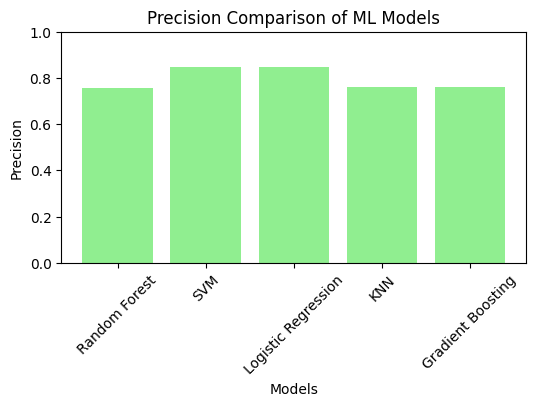

In [16]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logreg, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

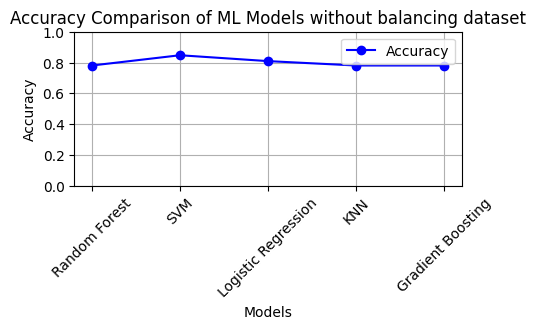

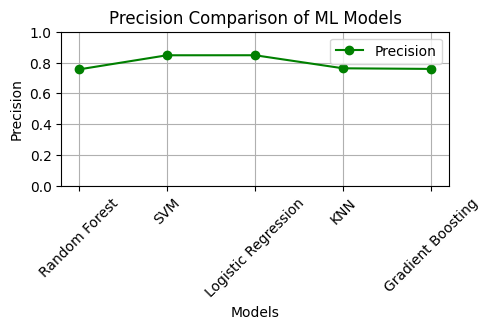

In [17]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logreg, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logreg, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

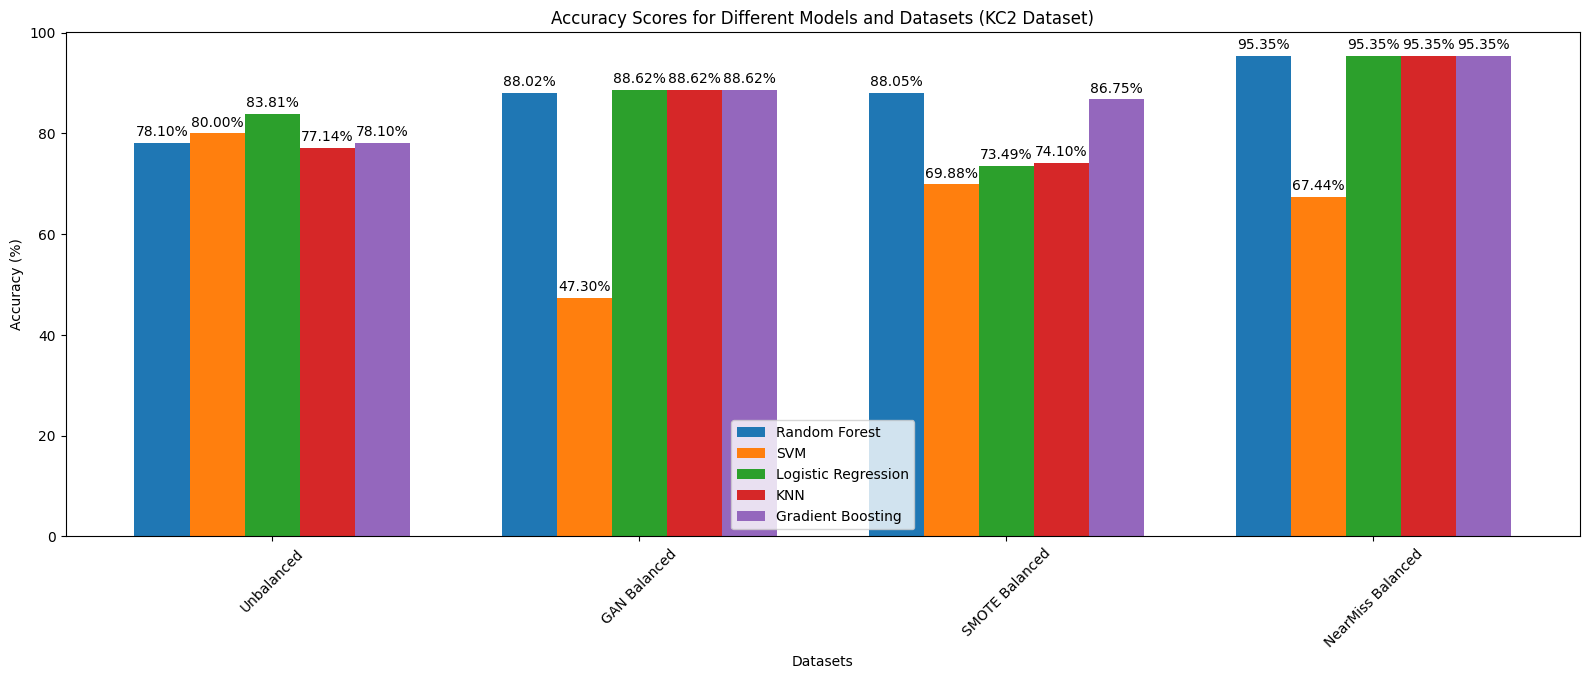

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the models and datasets
# models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
# datasets = ['Unbalanced', 'GAN Balanced', 'SMOTE Balanced', 'NearMiss Balanced']

# # Accuracy scores for each model and dataset for KC2
# accuracy_scores_kc2 = {
#     'Random Forest': [78.10, 88.02, 88.05, 95.35],
#     'SVM': [80.00, 47.30, 69.88, 67.44],
#     'Logistic Regression': [83.81, 88.62, 73.49, 95.35],
#     'KNN': [77.14, 88.62, 74.10, 95.35],
#     'Gradient Boosting': [78.10, 88.62, 86.75, 95.35]
# }

# # Create subplots
# fig, ax = plt.subplots(figsize=(16, 6))

# # Plotting accuracy scores for each model and dataset
# bar_width = 0.15
# index = np.arange(len(datasets))

# for i, model in enumerate(models):
#     bar_positions = [x + i * bar_width for x in index]
#     bars = ax.bar(bar_positions, accuracy_scores_kc2[model], bar_width, label=model)
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# # Add labels and title
# ax.set_xlabel('Datasets')
# ax.set_ylabel('Accuracy (%)')
# ax.set_title('Accuracy Scores for Different Models and Datasets (KC2 Dataset)')
# ax.set_xticks([r + bar_width * 2 for r in range(len(datasets))])
# ax.set_xticklabels(datasets)
# ax.legend()

# # Show plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()
